# Sub-daily data
NeuralProphet can make forecasts for time series with sub-daily observations by passing in a dataframe with timestamps in the ds column. The format of the timestamps should be `YYYY-MM-DD HH:MM:SS` - see the example csv [here](https://github.com/ourownstory/neural_prophet/blob/master/example_data/yosemite_temps.csv). When sub-daily data are used, daily seasonality will automatically be fit. 

Here we fit NeuralProphet to data with 5-minute resolution (daily temperatures at Yosemite). 

Using some common sense, we set:
* First, we disable weekly seasonality, as nature does not follow the human week's calendar.
* Second, we disable changepoints, as the dataset only contains two months of data

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet
df = pd.read_csv('../example_data/yosemite_temps.csv')

In [2]:
m = NeuralProphet(
    n_changepoints=0,
    weekly_seasonality=False,
    log_level="ERROR",
)
metrics = m.fit(df, freq='5min')

Now we will attempt to forecast the next 7 days. The `5min` data resulution means that we have `60/5*24=288` daily values. Thus, we want to forecast `7*288` periods ahead.

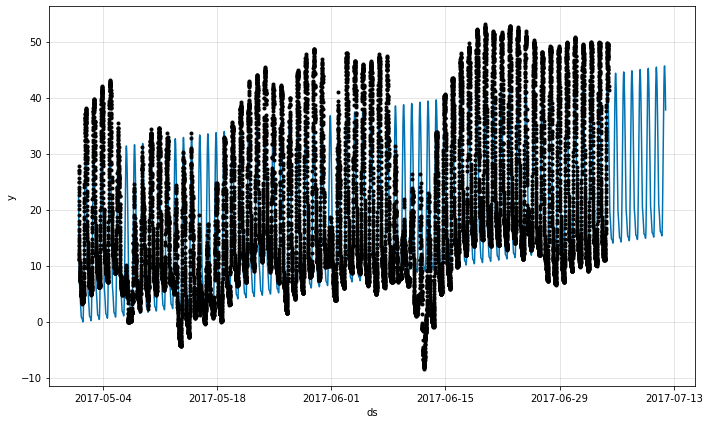

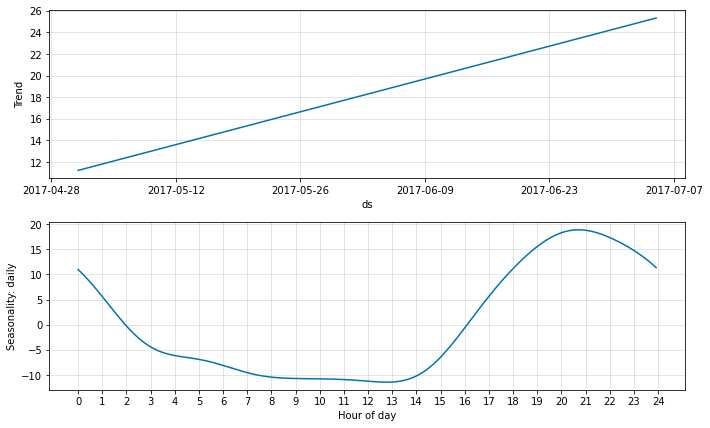

In [3]:
future = m.make_future_dataframe(df, periods=7*288, n_historic_predictions=len(df))
forecast = m.predict(future)
fig = m.plot(forecast)
# fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()

## Improving trend and seasonality 
The daily seasonality seems to make sense, when we account for the time is recorded in GMT, while Yosemite local time is GMT-8.
As we have `288` daily values recorded, we can increase the flexibility of `daily_seasonality`, without danger of overfitting. 

Further, we may want to re-visit our decision to disable changepoints, as the data clearly shows changes in trend, as is typical with the weather. We make the following changes:
* increase the `changepoints_range`, as the we are doing a short-term prediction
* inrease the `n_changepoints` to allow to fit to the sudden changes in trend
* carefully regularize the trend changepoints by setting `trend_reg` in order to avoid overfitting

In [4]:
m = NeuralProphet(
    changepoints_range=0.95,
    n_changepoints=50,
    trend_reg=1.5,
    weekly_seasonality=False,
    daily_seasonality=10,
    log_level="ERROR",
)
metrics = m.fit(df, freq='5min')

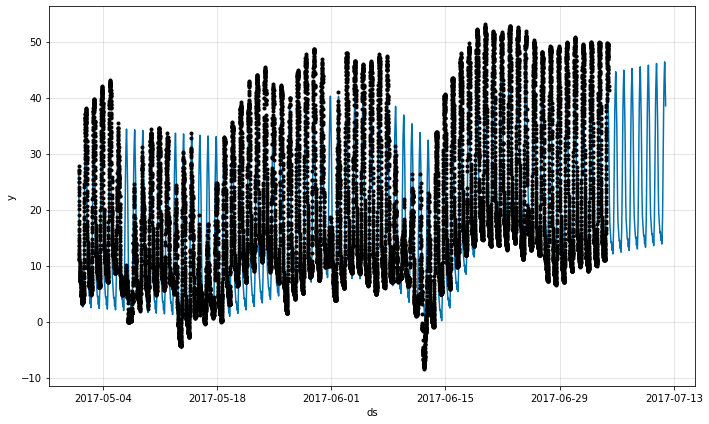

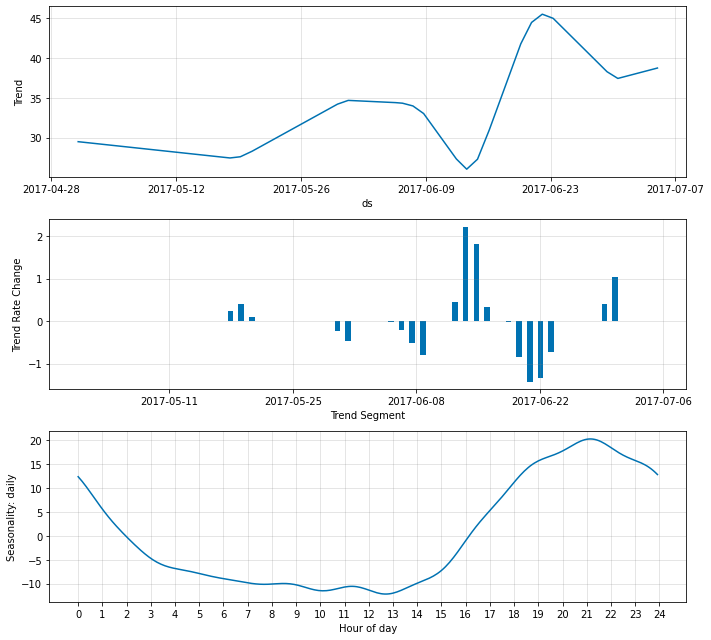

In [5]:
future = m.make_future_dataframe(df, periods=60//5*24*7, n_historic_predictions=len(df))
forecast = m.predict(future)
fig = m.plot(forecast)
# fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()